In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns


raw_data = pd.read_csv("./data.csv", index_col =0)

pd.set_option("display.max_colwidth",None)
#pd.set_option("display.max_rows",raw_data.shape[0]+1)

raw_data

,Date,Headline,Comment,Rating
0,2021-08-28T06:16:29Z,Fresh product good service quick delivery,I like to do online shopping with Haris farm \nEasy to shop online the pictures of product are clearly \nGood price \nDelivery on time \nStaff well trained \nGood service,5
1,2021-08-27T23:27:53Z,"Wow, excellent quality and service",So happy with the quality and value of the produce. Freshness is amazing. I'll never buy from the supermarket again! Thank you company name,5
2,2021-08-27T08:46:10Z,So easy to send lockdown surprise !!!,Ordering easy. Invoice inform order done ! Loved tracking ! \n\nThank you company name for perfect way to surprise those in lockdown .,5
3,2021-08-27T06:31:36Z,Awesome quality produce and service,"Quick delivery, awesome tracking app and communication, really fresh food which was well packaged in recyclable/reusable boxes and bags. Thanks so much!",5
4,2021-08-27T04:14:09Z,"Great produce, efficient service",company name is a great business with fabulous produce and is a well run organisation. I love the fact that they are considering more and more environmental ways of delivering orders.\n,4
...,...,...,...,...
220,2021-07-20T04:46:03Z,5 Stars,"Waiting for our Covid results and not able to go out, company name online was easier and faster than any of the major supermarket chains",5
221,2021-07-20T03:54:47Z,Delivered as expected,"The order delivery was excellent. However the customer service with a problem I was having was not so good, see separate reply.",5
222,2021-07-20T00:37:01Z,Convenient and painfree!,"Ordering fresh produce and groceries online with company name is easy to do, their communication is excellent and of course the quality is outstanding. Thank you!",5
223,2021-07-19T23:00:53Z,Delicious Fresh Safe easy,"Fresh Delicious \nDave’s pick fun: bag of oranges delicious surprise! \nDelivery guy friendly ; masked, brought it up 2 flights stairs !",5


In [2]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 0 to 224
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      225 non-null    object
 1   Headline  225 non-null    object
 2   Comment   225 non-null    object
 3   Rating    225 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 8.8+ KB


In [3]:
raw_data.describe()

,Rating
count,225.000000
mean,4.328889
std,1.315536
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [4]:
raw_data["Rating"].value_counts()

5    167
1     23
4     18
3     10
2      7
Name: Rating, dtype: int64

# Data Cleaning

In [5]:
#pd.reset_option("display.max_rows")
import re

review_data = raw_data.copy()
review_data.columns = review_data.columns.str.lower()

#remove some line break etc.
review_data["comment"].replace(r"\t+|\n+|\r+","",regex = True, inplace = True)
review_data["headline"].replace(r"\t+|\n+|\r+","",regex = True, inplace = True)

review_data["comment"]= review_data["comment"].str.lower()
review_data["headline"]= review_data["headline"].str.lower()

#convert to date type
review_data["date"] = review_data["date"].str[:10]
review_data["date"] = pd.to_datetime(review_data["date"],format ="%Y-%m-%d")

#don't need special character
review_data["comment"] = review_data["comment"].map(lambda x: re.sub("[^A-Za-z0-9\s]+","",x))
review_data["headline"] = review_data["headline"].map(lambda x: re.sub("[^A-Za-z0-9\s]+","",x))

review_data

,date,headline,comment,rating
0,2021-08-28,fresh product good service quick delivery,i like to do online shopping with haris farm easy to shop online the pictures of product are clearly good price delivery on time staff well trained good service,5
1,2021-08-27,wow excellent quality and service,so happy with the quality and value of the produce freshness is amazing ill never buy from the supermarket again thank you company name,5
2,2021-08-27,so easy to send lockdown surprise,ordering easy invoice inform order done loved tracking thank you company name for perfect way to surprise those in lockdown,5
3,2021-08-27,awesome quality produce and service,quick delivery awesome tracking app and communication really fresh food which was well packaged in recyclablereusable boxes and bags thanks so much,5
4,2021-08-27,great produce efficient service,company name is a great business with fabulous produce and is a well run organisation i love the fact that they are considering more and more environmental ways of delivering orders,4
...,...,...,...,...
220,2021-07-20,5 stars,waiting for our covid results and not able to go out company name online was easier and faster than any of the major supermarket chains,5
221,2021-07-20,delivered as expected,the order delivery was excellent however the customer service with a problem i was having was not so good see separate reply,5
222,2021-07-20,convenient and painfree,ordering fresh produce and groceries online with company name is easy to do their communication is excellent and of course the quality is outstanding thank you,5
223,2021-07-19,delicious fresh safe easy,fresh delicious daves pick fun bag of oranges delicious surprise delivery guy friendly masked brought it up 2 flights stairs,5


In [6]:
#there are emojis in the comment, create a list to have all these emojis
#obsolete - use regex earlier to clean them up

# from emoji import UNICODE_EMOJI
# emoji_list = []

# for text in abc["new_comment"]:
#     for char in text:        
#         emoji_list.append(char) if char in UNICODE_EMOJI["en"] else None
        
# print (emoji_list)

# for item in emoji_list:
#     review_data["comment"].replace(item,"", regex= True,inplace=True)
    
# review_data.tail()

# EDA

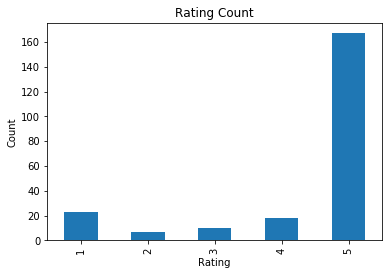

In [7]:
review_data["rating"].value_counts().sort_index().plot.bar()
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Rating Count")
plt.show()

In [8]:
#create function to return text without stopwords

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stopwords = stopwords.words()
stopwords.append("company name")
stopwords.append("company")

def no_sw(text):    
    tokens = word_tokenize(text)
    tokens_no_sw = [word for word in tokens if not word in stopwords]
    new_text = (" ").join(tokens_no_sw)
    
    return new_text

In [9]:
#combine headline to comment into one column
review_data["message"] = review_data["headline"] + " " + review_data["comment"]
review_data.head(3)

,date,headline,comment,rating,message
0,2021-08-28,fresh product good service quick delivery,i like to do online shopping with haris farm easy to shop online the pictures of product are clearly good price delivery on time staff well trained good service,5,fresh product good service quick delivery i like to do online shopping with haris farm easy to shop online the pictures of product are clearly good price delivery on time staff well trained good service
1,2021-08-27,wow excellent quality and service,so happy with the quality and value of the produce freshness is amazing ill never buy from the supermarket again thank you company name,5,wow excellent quality and service so happy with the quality and value of the produce freshness is amazing ill never buy from the supermarket again thank you company name
2,2021-08-27,so easy to send lockdown surprise,ordering easy invoice inform order done loved tracking thank you company name for perfect way to surprise those in lockdown,5,so easy to send lockdown surprise ordering easy invoice inform order done loved tracking thank you company name for perfect way to surprise those in lockdown


In [10]:
good_comment = review_data[(review_data["rating"] == 4) |(review_data["rating"] == 5)]["message"].apply(no_sw)
bad_comment = review_data[(review_data["rating"] == 1) |(review_data["rating"] == 2)]["message"].apply(no_sw)
neutral_comment = review_data[review_data["rating"] == 3]["message"].apply(no_sw)

In [11]:
from collections import Counter

good_tokens = Counter(" ".join(good_comment).split()).most_common(20)
neutral_tokens = Counter(" ".join(bad_comment).split()).most_common(20)
bad_tokens = Counter(" ".join(neutral_comment).split()).most_common(20)

print(good_tokens,"\n")
print(neutral_tokens,"\n")
print(bad_tokens)

[('delivery', 129), ('service', 108), ('great', 97), ('quality', 93), ('fresh', 85), ('produce', 82), ('online', 73), ('good', 59), ('time', 57), ('order', 55), ('products', 52), ('easy', 44), ('excellent', 43), ('food', 38), ('fruit', 38), ('love', 36), ('well', 33), ('always', 30), ('items', 29), ('happy', 28)] 

[('delivery', 48), ('order', 34), ('items', 27), ('service', 21), ('missing', 18), ('online', 18), ('time', 15), ('customer', 15), ('would', 14), ('ordered', 12), ('delivered', 12), ('refund', 10), ('first', 9), ('4', 8), ('received', 8), ('days', 7), ('get', 7), ('told', 7), ('experience', 7), ('email', 7)] 

[('delivery', 17), ('product', 6), ('first', 5), ('order', 5), ('products', 5), ('replacements', 5), ('box', 4), ('time', 4), ('happy', 4), ('however', 4), ('fresh', 4), ('packaged', 4), ('better', 3), ('delivered', 3), ('substitutions', 3), ('made', 3), ('great', 3), ('date', 3), ('apartment', 3), ('could', 2)]


In [ ]:
plt.figure(figsize=(15,8))

x_good = [tag for tag,count in good_tokens]
y_good = [count for tag,count in good_tokens]

x_neu = [tag for tag,count in neutral_tokens]
y_neu = [count for tag,count in neutral_tokens]

x_bad = [tag for tag,count in bad_tokens]
y_bad = [count for tag,count in bad_tokens]

plt.bar(x_good,y_good, color="blue")
plt.bar(x_neu,y_neu, color = "orange")
plt.bar(x_bad,y_bad, color = "red")

plt.xlabel("Key Word")
plt.ylabel("Count")
plt.title("Most Common Words")

plt.xticks(rotation=90)
plt.legend(["good","neutral","bad"], loc="upper right")

plt.show()

# Data Preparation for ML

In [ ]:
#create new dataset. Rating 1,2 is bad(0), >3 is good(1)

nlp_data = review_data.copy()
#classification of rating
nlp_data["target"] = nlp_data["rating"].apply(lambda x:0 if x==1 or x==2 else 1)

#remove unnecessary columns
nlp_data.drop(columns={"headline","comment","date","rating"}, inplace=True)
#remove stop words
nlp_data["message"]=nlp_data["message"].apply(no_sw)
nlp_data.head(10)

# Count Vectorizer for ML

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

y=nlp_data["target"]

vectorizer = CountVectorizer(
    max_features=1000,
    ngram_range=(1,2),
    binary=True
)

vectorizer.fit(nlp_data["message"])
X= pd.DataFrame(
    data=vectorizer.transform(nlp_data["message"]).todense(), 
    columns = vectorizer.get_feature_names()
)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=45, stratify =y)


# Knn ML model

In [ ]:
#KNN with hyperparrameters tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid_params = { 'n_neighbors' : list(range(5,100)),
               'weights' : ['uniform','distance'],
               'leaf_size' : list(range(10,40))}

rs = RandomizedSearchCV(KNeighborsClassifier(), grid_params,verbose = 0, cv=3, random_state = 55)

rs.fit(X_train,y_train)

predicted = rs.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test,predicted)}")
print(f"Precision: {metrics.precision_score(y_test,predicted)}")
print(f"Recall: {metrics.precision_score(y_test,predicted)}")

print(f"Best estimator: {rs.best_estimator_}")

metrics.plot_confusion_matrix(rs,X_test, y_test)

metrics.plot_roc_curve(rs,X_test, y_test)

# Logistics Regression ML

In [ ]:
from sklearn.linear_model import LogisticRegression

clr = LogisticRegression()
clr.fit(X_train, y_train)

predicted = clr.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test,predicted)}")
print(f"Precision: {metrics.precision_score(y_test,predicted)}")
print(f"Recall: {metrics.precision_score(y_test,predicted)}")
print(metrics.confusion_matrix(y_test, predicted))

metrics.plot_confusion_matrix(clr,X_test, y_test)

metrics.plot_roc_curve(clr,X_test, y_test)

In [ ]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

nlp_data["tokens"] = nlp_data["message"].apply(lambda x: nlp(x))
nlp_data["lemma"] = nlp_data["message"].apply(lambda x: [y.lemma_ for y in nlp(x)])
nlp_data["vec"] = nlp_data["message"].apply(lambda x: [y._.polarity for y in nlp(x)])
#nlp_data["vec"]=nlp_data["vec"].mean

nlp_data.head(10)